In [35]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [37]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [40]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
print(X_train.shape,y_train.shape)

(8000, 10) (8000,)


In [43]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
print(X_train.shape,X_test.shape)

(8000, 10) (2000, 10)


Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.4900 - accuracy: 0.7952
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4346 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4313 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4270 - accuracy: 0.8004
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4233 - accuracy: 0.8204
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8240
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4187 - accuracy: 0.8263
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4164 - accuracy: 0.8294
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0.8315
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4140 - accura

Text(0.5, 1.0, 'Test accuracy: 39.8 %')

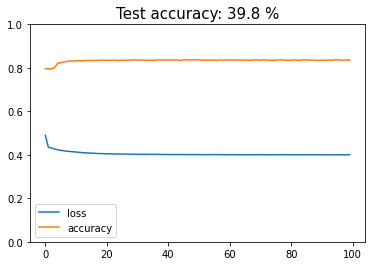

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

import keras.backend as k 

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


history = classifier.fit(X_train,y_train,epochs=100,batch_size = 10)
result = classifier.evaluate(X_test,y_test)

historydf = pd.DataFrame(history.history,index=history.epoch)
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[0]*100),fontsize=15)

#Loss Functions

In [45]:
dflist = []

loss_functions = ['binary_crossentropy','hinge','squared_hinge']

for ls in loss_functions:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = ls, metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))   

Epoch 1/25
500/500 [==============================] - 1s 2ms/step - loss: 0.5170 - accuracy: 0.7955
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4359 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4337 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4288 - accuracy: 0.7960
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4249 - accuracy: 0.8091
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.8175
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4200 - accuracy: 0.8240
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8286
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8291

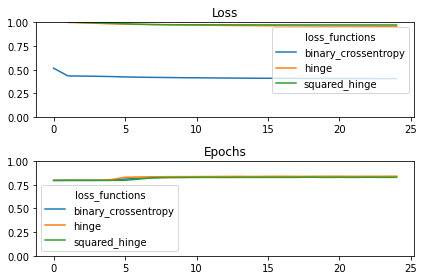

In [47]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([loss_functions,metrics_reported],names=['loss_functions','metric'])

historydf.shape
idx.shape


historydf.columns = idx

ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

plt.tight_layout()

# Learning Rates

In [ ]:
dflist = []

learning_rates = [0.01,0.05,0.10,0.5]

for lr in learning_rates:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))   



Epoch 1/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5132 - accuracy: 0.7961
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4341 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4291 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4249 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4215 - accuracy: 0.8176
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4192 - accuracy: 0.8253
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8284
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4155 - accuracy: 0.8313
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8319
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4133 - accuracy: 0.8331

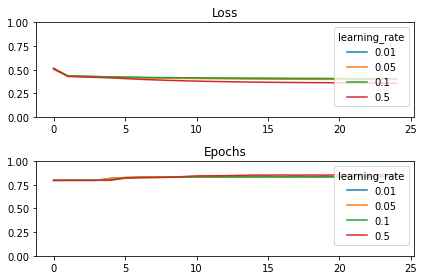

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates,metrics_reported],names=['learning_rate','metric'])

historydf.shape
idx.shape


historydf.columns = idx

ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

plt.tight_layout()

# Batch sizes

In [ ]:
dflist = []

batch_sizes = [16,32,64,128]

for lr in batch_sizes:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))   


Epoch 1/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5248 - accuracy: 0.7952
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4357 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4314 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4275 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4242 - accuracy: 0.8059
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4220 - accuracy: 0.8207
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4203 - accuracy: 0.8264
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4190 - accuracy: 0.8294
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4179 - accuracy: 0.8311
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8317

Text(0.5, 1.0, 'Epochs')

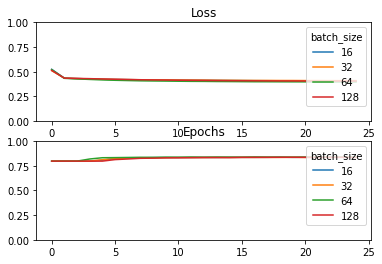

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes,metrics_reported],names=['batch_size','metric'])

historydf.columns = idx

ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

# Optimizers

In [ ]:
#from keras.optimizers import SGD,Adam,Adagrad,RMSprop

from tensorflow import keras
from tensorflow.keras import layers

#keras.optimizers.SGD
#keras.optimizers.Adam
#keras.optimizers.Adagrad
#keras.optimizers.RMSprop

dflist = []



optimizers = ['keras.optimizers.SGD()',
		'keras.optimizers.Adam()','keras.optimizers.Adagrad()', 'keras.optimizers.RMSprop()']



for opt_name in optimizers:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = eval(opt_name), loss = 'binary_crossentropy', metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))    

Epoch 1/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5810 - accuracy: 0.7961
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5161 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5077 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5063 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5060 - accuracy: 0.7960
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960

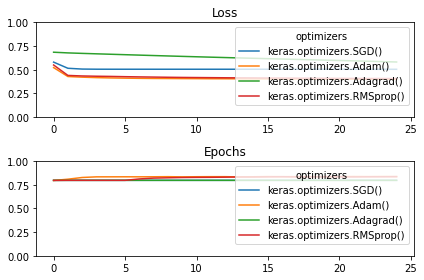

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers,metrics_reported],names=['optimizers','metric'])

historydf.columns = idx

ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

plt.tight_layout()

# Initializers

In [ ]:
dflist = []

initializers = ['zeros','uniform','normal','he_normal','lecun_uniform']

for init in initializers:

    k.clear_session()
    
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = init, activation = 'relu', input_dim = 10))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = init, activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = init, activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

    h = classifier.fit(X_train,y_train,epochs=25,batch_size=16,verbose=1)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))    


Epoch 1/25
500/500 [==============================] - 1s 2ms/step - loss: 0.6326 - accuracy: 0.7960
Epoch 2/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7960
Epoch 3/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5186 - accuracy: 0.7960
Epoch 4/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5086 - accuracy: 0.7960
Epoch 5/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5065 - accuracy: 0.7960
Epoch 6/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5060 - accuracy: 0.7960
Epoch 7/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5060 - accuracy: 0.7960
Epoch 8/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5060 - accuracy: 0.7960
Epoch 9/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960
Epoch 10/25
500/500 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7960

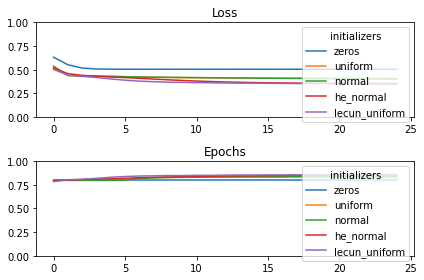

In [ ]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers,metrics_reported],names=['initializers','metric'])

historydf.columns = idx

ax = plt.subplot(211)
historydf.xs('loss',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Loss")
	
ax = plt.subplot(212)
historydf.xs('accuracy',axis=1,level='metric').plot(ylim=(0,1),ax=ax)
plt.title("Accuracy")
plt.title("Epochs")

plt.tight_layout()